In [1]:
import pandas as pd
from uszipcode import SearchEngine
import pandas as pd
import requests
import json
import pprint as pprint
from tqdm import tqdm_notebook
from config import gkey
import gmaps
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
zip_data = "Project1_Zipcode_Data.csv"
zip_data_df = pd.read_csv(zip_data, dtype=str, low_memory=False)

In [3]:
zip_data_df.head()

,Zip Code,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Total No HS Diploma,No HS Diploma Rate,Total HS Diploma,...,Never Married Rate,Married,Married Rate,Widowed,Widowed Rate,Divorced,Divorced Rate,Over 15 Marital Status,Lat,Lng
0,00601,17599.0,38.9,11757.0,7041.0,11282.0,64.105915108813,4288,36.12772769399275,2967,...,39.26204924321685,5846,40.775615540210644,863,6.019390388505267,1999,13.942944828067239,14337.0,NaN,NaN
1,00602,39209.0,40.9,16190.0,8978.0,20428.0,52.10028309826826,9407,34.17620345140781,6322,...,36.6230064883876,14586,44.22412224849918,2136,6.47625977806076,4181,12.676611485052453,32982.0,18.36,-67.18
2,00603,50135.0,40.4,16645.0,10897.0,25176.0,50.21641567767029,10310,29.464719499299818,9657,...,35.96377438262708,17614,42.312866339963485,3098,7.442106274622851,5945,14.281253002786586,41628.0,18.45,-67.11
3,00606,6304.0,42.8,13387.0,5960.0,4092.0,64.91116751269035,2147,49.40174873446848,1351,...,45.994684889901286,1880,35.68716780561883,431,8.181473044798786,534,10.136674259681094,5268.0,18.2,-66.9
4,00610,27590.0,41.4,18741.0,9266.0,12553.0,45.498368974266036,6260,32.553302132085285,6032,...,34.993288009353485,10581,45.81907937470229,1772,7.6733209197592345,2659,11.514311696184992,23093.0,18.28,-67.13


In [4]:
zip_data_df["Household Income"]=zip_data_df["Household Income"].astype(float)

zip_data_df["Population"]=zip_data_df["Population"].astype(float)
zip_data_df["Poverty Count"]=zip_data_df["Poverty Count"].astype(float)

zip_data_df["Total No HS Diploma"]=zip_data_df["Total No HS Diploma"].astype(int)
zip_data_df["No HS Diploma Rate"]=zip_data_df["No HS Diploma Rate"].astype(float)

zip_data_df["Total HS Diploma"]=zip_data_df["Total No HS Diploma"].astype(int)
zip_data_df["HS Diploma Rate"]=zip_data_df["HS Diploma Rate"].astype(float)

zip_data_df["Total Some College"]=zip_data_df["Total Some College"].astype(int)
zip_data_df["Some College Rate"]=zip_data_df["Some College Rate"].astype(float)

zip_data_df["Total College Degree"]=zip_data_df["Total Some College"].astype(int)
zip_data_df["College Degree Rate"]=zip_data_df["Some College Rate"].astype(float)


zip_data_df["Total educational attainment over 25"]=zip_data_df["Total educational attainment over 25"].astype(float)

zip_data_df["Never Married"]=zip_data_df["Never Married"].astype(int)
zip_data_df["Never Married Rate"]=zip_data_df["Never Married Rate"].astype(float)


zip_data_df["Married"]=zip_data_df["Married"].astype(int)
zip_data_df["Married Rate"]=zip_data_df["Married Rate"].astype(float)


zip_data_df["Widowed"]=zip_data_df["Widowed"].astype(int)
zip_data_df["Widowed Rate"]=zip_data_df["Widowed Rate"].astype(float)

zip_data_df["Divorced"]=zip_data_df["Divorced"].astype(int)
zip_data_df["Divorced Rate"]=zip_data_df["Divorced Rate"].astype(float)


In [5]:
zip_data_df.dtypes

Zip Code                                 object
Population                              float64
Median Age                               object
Household Income                        float64
Per Capita Income                        object
Poverty Count                           float64
Poverty Rate                             object
Total No HS Diploma                       int64
No HS Diploma Rate                      float64
Total HS Diploma                          int64
HS Diploma Rate                         float64
Total Some College                        int64
Some College Rate                       float64
Total College Degrees                    object
College Degree Rate                     float64
Total educational attainment over 25    float64
Never Married                             int64
Never Married Rate                      float64
Married                                   int64
Married Rate                            float64
Widowed                                 

In [6]:
zip_data_df=zip_data_df.dropna()

In [7]:
locations = zip_data_df[["Lat","Lng"]].astype(float)

# Convert to float and store

locations = zip_data_df[["Lat","Lng"]].astype(float)
poverty= zip_data_df["Poverty Count"]
HS = zip_data_df["HS Diploma Rate"]


fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations,weights=poverty,opacity=.5,point_radius=6)
heat_layer1 = gmaps.heatmap_layer(locations,weights=HS,opacity=.5,point_radius = 6)
heat_layer2 = gmaps.heatmap_layer(locations,weights=HS,opacity=.5,point_radius = 6)

fig.add_layer(heat_layer)
fig.add_layer(heat_layer1)
fig

Figure(layout=FigureLayout(height='420px'))

In [8]:
fp = "cb_2018_us_zcta510_500k (1)"

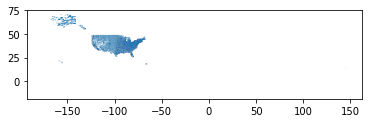

In [9]:
map_df = gpd.read_file(fp)

map_df.plot()


In [10]:
df_for_map = zip_data_df 

In [11]:
df_for_map.head()

,Zip Code,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Total No HS Diploma,No HS Diploma Rate,Total HS Diploma,...,Married,Married Rate,Widowed,Widowed Rate,Divorced,Divorced Rate,Over 15 Marital Status,Lat,Lng,Total College Degree
1,00602,39209.0,40.9,16190.0,8978.0,20428.0,52.10028309826826,9407,34.176203,9407,...,14586,44.224122,2136,6.476260,4181,12.676611,32982.0,18.36,-67.18,2849
2,00603,50135.0,40.4,16645.0,10897.0,25176.0,50.21641567767029,10310,29.464719,10310,...,17614,42.312866,3098,7.442106,5945,14.281253,41628.0,18.45,-67.11,4597
3,00606,6304.0,42.8,13387.0,5960.0,4092.0,64.91116751269035,2147,49.401749,2147,...,1880,35.687168,431,8.181473,534,10.136674,5268.0,18.2,-66.9,167
4,00610,27590.0,41.4,18741.0,9266.0,12553.0,45.498368974266036,6260,32.553302,6260,...,10581,45.819079,1772,7.673321,2659,11.514312,23093.0,18.28,-67.13,2032
5,00612,62566.0,41.4,17744.0,10283.0,29872.0,47.74478151072468,10335,23.903139,10335,...,20746,39.911504,4644,8.934205,7957,15.307811,51980.0,18.4,-66.68,5841


In [12]:
# join the geodataframe with the cleaned up csv dataframe
map_df.reset_index(inplace = True)
map_df.head()




,index,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,0,36083,8600000US36083,36083,659750662,5522919,"(POLYGON ((-85.63224699999999 32.280982, -85.6..."
1,1,35441,8600000US35441,35441,172850429,8749105,"(POLYGON ((-87.83287399999999 32.844372, -87.8..."
2,2,35051,8600000US35051,35051,280236456,5427285,"POLYGON ((-86.743844 33.250019, -86.7380189999..."
3,3,35121,8600000US35121,35121,372736030,5349303,"POLYGON ((-86.58526599999999 33.94743, -86.580..."
4,4,35058,8600000US35058,35058,178039922,3109259,"(POLYGON ((-86.87884199999999 34.211959, -86.8..."


In [13]:
merged= map_df.set_index("ZCTA5CE10").join(df_for_map.set_index('Zip Code'))

In [14]:
merged



,index,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,Population,Median Age,Household Income,Per Capita Income,...,Married,Married Rate,Widowed,Widowed Rate,Divorced,Divorced Rate,Over 15 Marital Status,Lat,Lng,Total College Degree
ZCTA5CE10,,,,,,,,,,,,,,,,,,,,,
36083,0,8600000US36083,36083,659750662,5522919,"(POLYGON ((-85.63224699999999 32.280982, -85.6...",7961.0,45.5,33223.0,22040.0,...,2426.0,36.042193,593.0,8.809984,893.0,13.266974,6731.0,32.4,-85.7,1209.0
35441,1,8600000US35441,35441,172850429,8749105,"(POLYGON ((-87.83287399999999 32.844372, -87.8...",1111.0,40.2,36731.0,20509.0,...,427.0,47.130243,72.0,7.947020,115.0,12.693157,906.0,32.9,-87.7,105.0
35051,2,8600000US35051,35051,280236456,5427285,"POLYGON ((-86.743844 33.250019, -86.7380189999...",9161.0,40.2,46315.0,23916.0,...,3976.0,51.831573,818.0,10.663538,1003.0,13.075218,7671.0,33.2,-86.6,1123.0
35121,3,8600000US35121,35121,372736030,5349303,"POLYGON ((-86.58526599999999 33.94743, -86.580...",15208.0,39.7,48814.0,24486.0,...,6932.0,56.038804,1380.0,11.156023,1333.0,10.776071,12370.0,34.0,-86.5,2128.0
35058,4,8600000US35058,35058,178039922,3109259,"(POLYGON ((-86.87884199999999 34.211959, -86.8...",9364.0,40.9,39078.0,23793.0,...,4680.0,61.152489,580.0,7.578727,910.0,11.890762,7653.0,34.2,-86.8,1417.0
35619,5,8600000US35619,35619,337059534,1410483,"POLYGON ((-87.285105 34.328819, -87.2823619999...",4279.0,42.2,48827.0,23343.0,...,2135.0,60.310734,147.0,4.152542,416.0,11.751412,3540.0,34.4,-87.1,703.0
35016,6,8600000US35016,35016,192546773,1522014,"POLYGON ((-86.581328 34.367154, -86.5813199999...",16473.0,42.7,45435.0,25113.0,...,7664.0,56.101310,1031.0,7.547032,1910.0,13.981407,13661.0,34.3,-86.5,2970.0
36115,7,8600000US36115,36115,1536423,0,"POLYGON ((-86.25523199999999 32.408978, -86.25...",917.0,23.7,56406.0,29160.0,...,397.0,70.017637,4.0,0.705467,31.0,5.467372,567.0,32.408,-86.248,147.0
36353,8,8600000US36353,36353,249818378,245714,"(POLYGON ((-85.25687499999999 31.416986, -85.2...",1848.0,42.9,46750.0,24716.0,...,748.0,47.979474,160.0,10.262989,200.0,12.828736,1559.0,31.5,-85.3,306.0


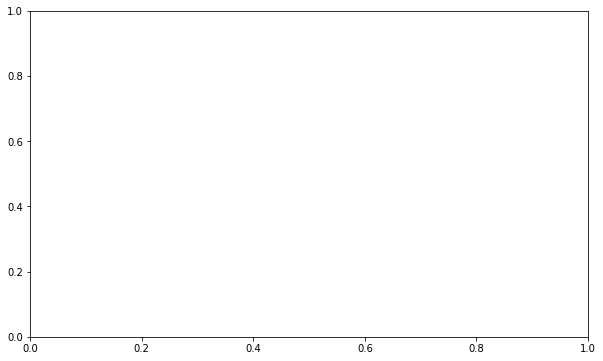

In [18]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Household Income'
# set the range for the choropleth
vmin, vmax = 1, 1000000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

In [19]:
merged.plot(column=variable, cmap= "Blues", linewidth=0.8, ax=ax, edgecolor= "0.8")


<Figure size 432x288 with 0 Axes>